In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_excel('MMM_Blender_data_2.xlsx')
data.head()

,Date,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
0,Jan-2008,6237000,181222.548442,12152.540107,24986.912760,135.0
1,Feb-2008,6115500,179104.353164,57353.376363,17574.385360,135.0
2,Mar-2008,10577250,222756.223235,146794.245435,16016.022899,135.0
3,Apr-2008,13473000,188266.818315,376459.468169,29689.694160,135.0
4,May-2008,6258525,210038.289741,21297.573231,17606.991440,136.5


In [28]:
data.describe()

,Sales ($),TV_ads ($),online_ads ($),Print_ads ($),Price ($)
count,1.500000e+02,150.000000,150.000000,150.000000,150.000000
mean,7.387596e+06,200172.675917,123295.713622,19780.483463,158.150000
std,2.794341e+06,9486.447152,88241.498625,4875.143064,13.732799
min,7.854000e+05,176450.216326,876.373521,4716.529170,135.000000
25%,5.835769e+06,193755.149356,54933.854835,16695.656714,145.875000
50%,7.635600e+06,199504.100334,104538.370602,19926.875169,158.250000
75%,9.482625e+06,206391.579637,172074.250144,22933.492770,169.500000
max,1.380225e+07,222756.223235,442144.852073,32794.574130,180.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            150 non-null    object 
 1   Sales ($)       150 non-null    int64  
 2   TV_ads ($)      150 non-null    float64
 3   online_ads ($)  150 non-null    float64
 4   Print_ads ($)   150 non-null    float64
 5   Price ($)       150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
X = data[['TV_ads ($)', 'online_ads ($)', 'Print_ads ($)', 'Price ($)']]
y = data['Sales ($)']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Models For Regression

In [37]:
lin_reg = LinearRegression()

ridge_reg = Ridge(alpha=1.0)

lasso_reg = Lasso(alpha=1.0)

In [39]:
# Linear Regression
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [41]:
# Ridge Regression
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [43]:
# Lasso Regression
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Models For Machine Learning

In [46]:
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR(kernel='rbf')

In [48]:
# Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [50]:
# Gradient Boosting
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

In [52]:
# SVR
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Results

In [57]:
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression",
              "Random Forest", "Gradient Boosting", "Support Vector Regressor"],
    "MSE": [mse_lin, mse_ridge, mse_lasso, mse_rf, mse_gb, mse_svr],
    "R2 Score": [r2_lin, r2_ridge, r2_lasso, r2_rf, r2_gb, r2_svr]
}

results_df = pd.DataFrame(results)
results_df


,Model,MSE,R2 Score
0,Linear Regression,6.864558e+11,0.916871
1,Ridge Regression,6.864451e+11,0.916872
2,Lasso Regression,6.864558e+11,0.916871
3,Random Forest,9.115160e+11,0.889617
4,Gradient Boosting,4.924807e+11,0.940361
5,Support Vector Regressor,8.408735e+12,-0.018287


# Data Visualization

## Scatter plot of Sales vs Advertising channels

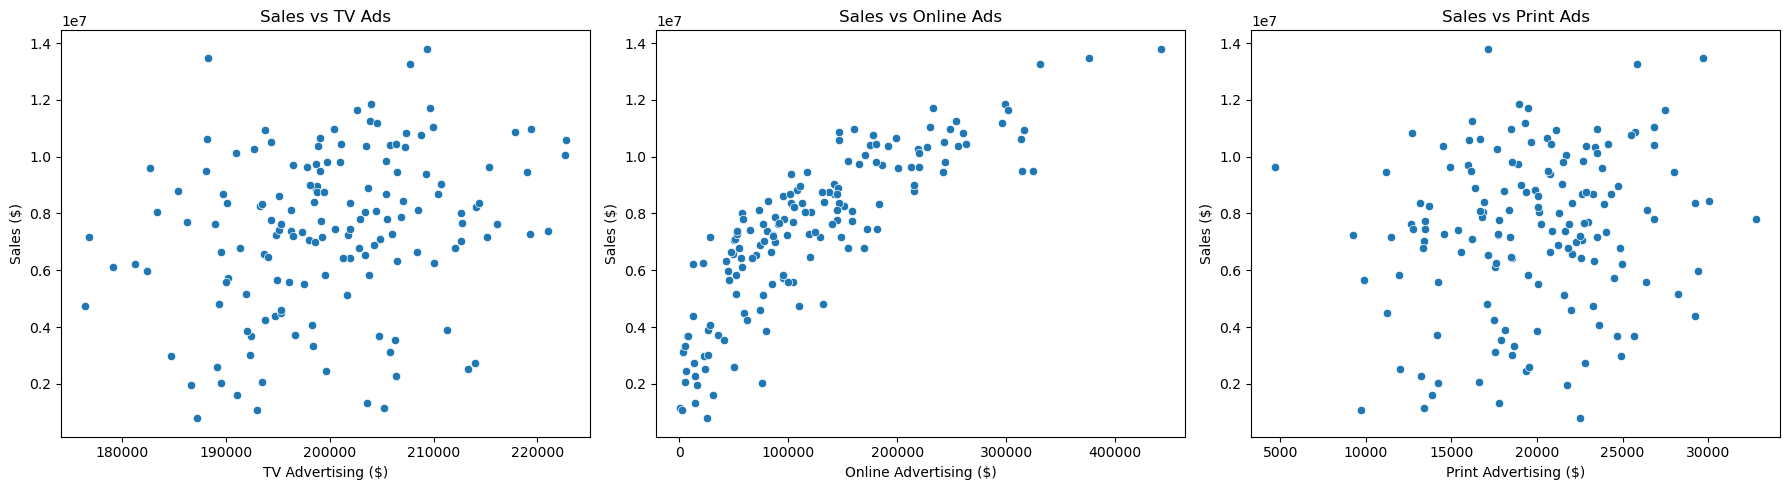

In [61]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x=data['TV_ads ($)'], y=data['Sales ($)'], ax=ax[0])
ax[0].set_title('Sales vs TV Ads')
ax[0].set_xlabel('TV Advertising ($)')
ax[0].set_ylabel('Sales ($)')

sns.scatterplot(x=data['online_ads ($)'], y=data['Sales ($)'], ax=ax[1])
ax[1].set_title('Sales vs Online Ads')
ax[1].set_xlabel('Online Advertising ($)')
ax[1].set_ylabel('Sales ($)')

sns.scatterplot(x=data['Print_ads ($)'], y=data['Sales ($)'], ax=ax[2])
ax[2].set_title('Sales vs Print Ads')
ax[2].set_xlabel('Print Advertising ($)')
ax[2].set_ylabel('Sales ($)')
plt.tight_layout()

## Scatter plot of Price vs Sales

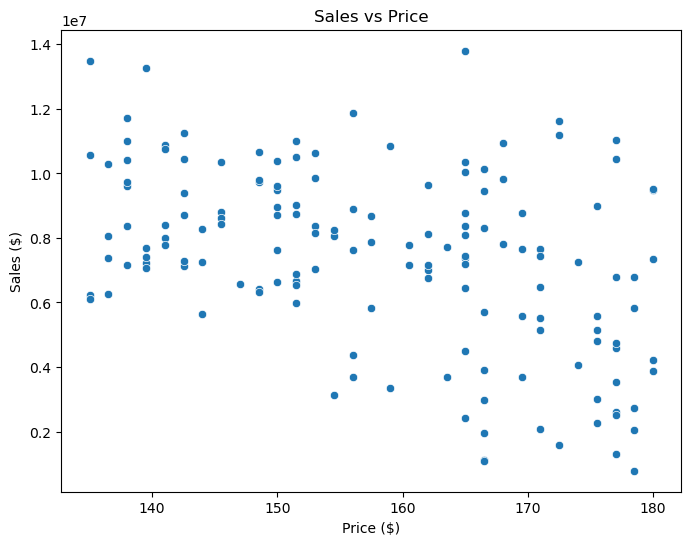

In [64]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Price ($)'], y=data['Sales ($)'])
plt.title('Sales vs Price')
plt.xlabel('Price ($)')
plt.ylabel('Sales ($)')
plt.show()

## Bar chart of MSE for each model

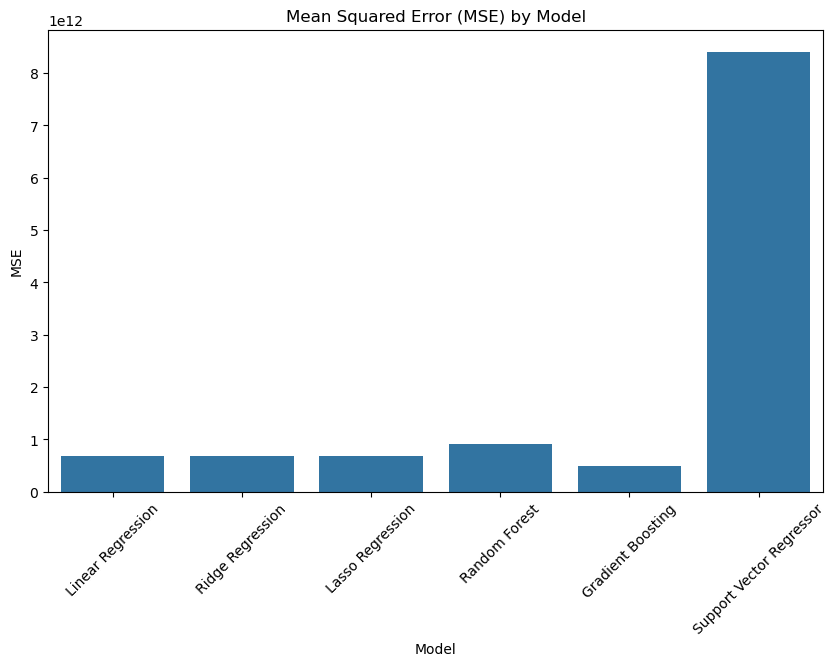

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df['Model'], y=results_df['MSE'])
plt.title('Mean Squared Error (MSE) by Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

## Bar chart of R*2 Score for each model

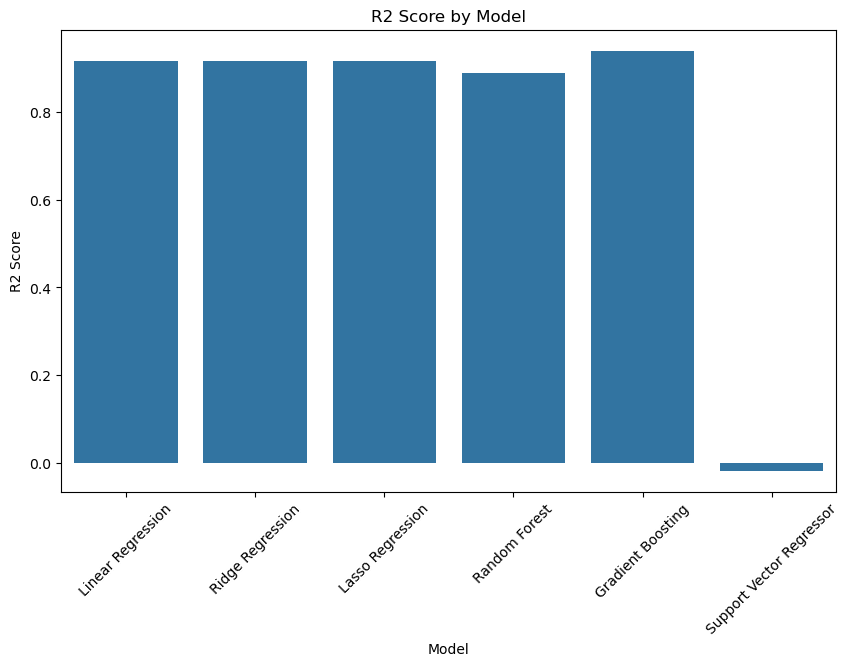

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df['Model'], y=results_df['R2 Score'])
plt.title('R2 Score by Model')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.show()

## Residual plot for the best-performing mode

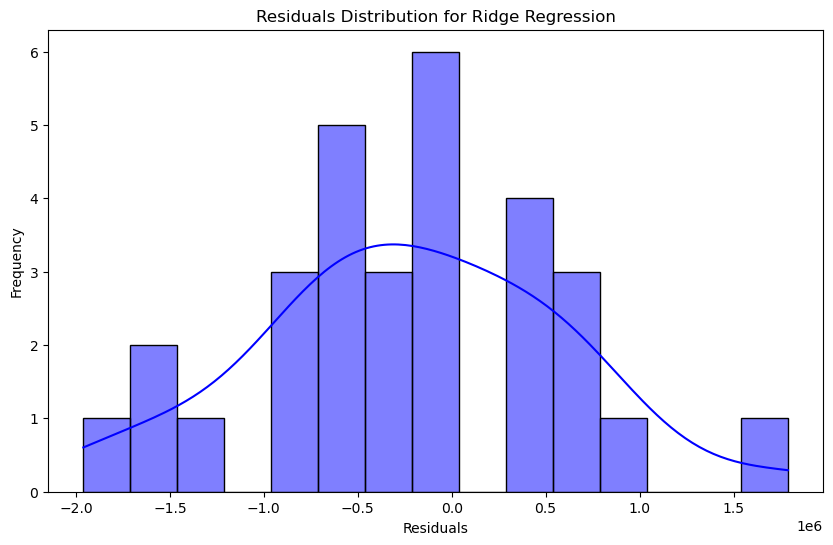

In [74]:
y_pred_best = y_pred_ridge
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue", bins=15)
plt.title('Residuals Distribution for Ridge Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Model Performance Comparison: MSE and R² Score

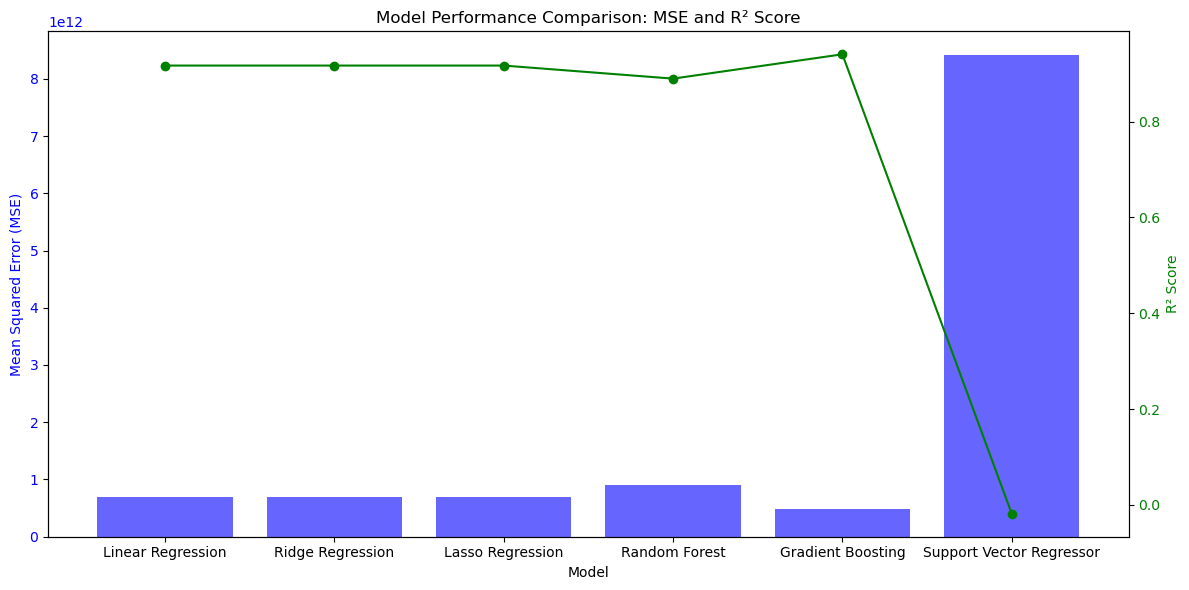

In [88]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(results_df["Model"], results_df["MSE"], color='blue', alpha=0.6, label="MSE")
ax1.set_xlabel("Model")
ax1.set_ylabel("Mean Squared Error (MSE)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(results_df["Model"], results_df["R2 Score"], color='green', marker='o', label="R² Score")
ax2.set_ylabel("R² Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Model Performance Comparison: MSE and R² Score")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

# Calculate ROI

In [90]:
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_

avg_values = X_test.mean()
avg_sales = y_test.mean()

roi_tv = coefficients[0] / avg_values['TV_ads ($)'] if avg_values['TV_ads ($)'] != 0 else 0
roi_online = coefficients[1] / avg_values['online_ads ($)'] if avg_values['online_ads ($)'] != 0 else 0
roi_print = coefficients[2] / avg_values['Print_ads ($)'] if avg_values['Print_ads ($)'] != 0 else 0
roi_price = coefficients[3] / avg_values['Price ($)'] if avg_values['Price ($)'] != 0 else 0

elasticity_tv = (coefficients[0] * avg_values['TV_ads ($)']) / avg_sales
elasticity_online = (coefficients[1] * avg_values['online_ads ($)']) / avg_sales
elasticity_print = (coefficients[2] * avg_values['Print_ads ($)']) / avg_sales
elasticity_price = (coefficients[3] * avg_values['Price ($)']) / avg_sales

roi_elasticity_results = {
    "Variable": ["TV_ads", "online_ads", "Print_ads", "Price"],
    "ROI": [roi_tv, roi_online, roi_print, roi_price],
    "Elasticity": [elasticity_tv, elasticity_online, elasticity_print, elasticity_price]
}

roi_elasticity_df = pd.DataFrame(roi_elasticity_results)

roi_elasticity_df


,Variable,ROI,Elasticity
0,TV_ads,0.000307,1.675859
1,online_ads,0.000200,0.465965
2,Print_ads,0.004409,0.220916
3,Price,-481.129797,-1.657789


## Elasticity and ROI Comparison Across Ad Channels

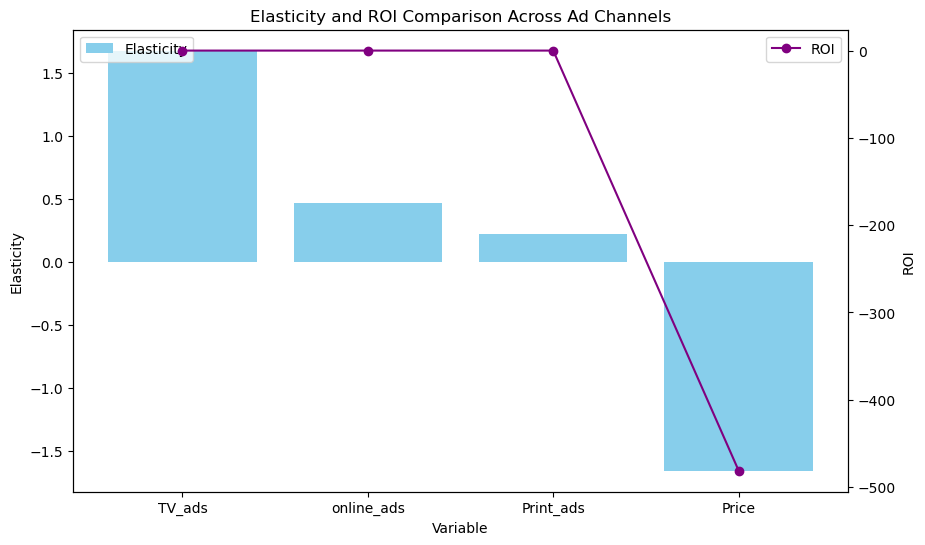

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(roi_elasticity_df["Variable"], roi_elasticity_df["Elasticity"], color='skyblue', label="Elasticity")
ax1.set_xlabel("Variable")
ax1.set_ylabel("Elasticity")
ax1.set_title("Elasticity and ROI Comparison Across Ad Channels")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(roi_elasticity_df["Variable"], roi_elasticity_df["ROI"], color='purple', marker='o', label="ROI")
ax2.set_ylabel("ROI")
ax2.legend(loc="upper right")

plt.xticks(rotation=45)
plt.show()
